# Import Libraries

In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load and Glimpse Data

**Train Data**

In [158]:
train = pd.read_csv(r'D:\Code\py_code\Single-Layer-Perceptron\data\train_data_cl_v2.csv', sep=',')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Test Data**

In [159]:
test = pd.read_csv(r'D:\Code\py_code\Single-Layer-Perceptron\data\test_data_cl_v2.csv', sep=',')
label = pd.read_csv(r'D:\Code\py_code\Single-Layer-Perceptron\data\test_data_GroundTruth_cl.csv', sep=',')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Sex          331 non-null    object 
 4   Age          331 non-null    float64
 5   SibSp        331 non-null    int64  
 6   Parch        331 non-null    int64  
 7   Ticket       331 non-null    object 
 8   Fare         331 non-null    float64
 9   Cabin        87 non-null     object 
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 28.6+ KB


In [162]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [163]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
dtype: int64

### Remove Unused Column

In [164]:
for i in ['Name', 'Ticket', 'Cabin']:
    del train[i]
    del test[i]

### Encode

In [165]:
lbenc = LabelEncoder()

Data Train

In [166]:
for i in train.columns.values:
    if train[i].dtypes == 'object':
        train[i] = lbenc.fit_transform(train[i])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Data Test

In [167]:
for i in test.columns.values:
    if test[i].dtypes == 'object':
        test[i] = lbenc.fit_transform(test[i])

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


### Splitting the data

Data Train

In [168]:
tr = train.copy()
x_train = tr.iloc[:, 2:].values
y_train = tr.iloc[:, 1].values

In [169]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 424, 1: 288}

Data Test

In [170]:
ts = test.copy()
lbl = label.copy()
x_test = ts.iloc[:, 1:].values
y_test = lbl.iloc[:, 1].values

In [171]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 204, 1: 127}

### Balancing the data

In [172]:
smt = SMOTE()

x_train, y_train = smt.fit_resample(x_train, y_train)
x_test, y_test = smt.fit_resample(x_test, y_test)

In [173]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 424, 1: 424}

In [174]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 204, 1: 204}

# Normalization

In [175]:
mnmx = MinMaxScaler()
x_train = mnmx.fit_transform(x_train)
x_test = mnmx.fit_transform(x_test)

In [176]:
x_train

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [0.        , 0.09390121, 0.24055551, ..., 0.        , 0.17777476,
        0.        ],
       [0.78280282, 0.        , 0.4290727 , ..., 0.16666667, 0.04185704,
        1.        ],
       [0.5       , 0.        , 0.23347575, ..., 0.        , 0.05074862,
        1.        ]])

In [177]:
x_test

array([[1.        , 1.        , 0.4527232 , ..., 0.        , 0.01528158,
        0.5       ],
       [1.        , 0.        , 0.61756561, ..., 0.        , 0.01366309,
        1.        ],
       [0.5       , 1.        , 0.8153765 , ..., 0.        , 0.01890874,
        0.5       ],
       ...,
       [0.        , 0.        , 0.28289896, ..., 0.15092617, 0.1206105 ,
        0.09444296],
       [0.        , 0.        , 0.51012711, ..., 0.        , 0.51212189,
        0.        ],
       [1.        , 0.        , 0.03466354, ..., 0.17853144, 0.02783188,
        1.        ]])

# Create Model

In [178]:
class PerceptronModel:
    def __init__(self, input_shape, learning_rate=0.01, activation_function='sigmoid'):
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.activation_function = activation_function

        # Set random seed for reproducibility
        tf.keras.utils.set_random_seed(42)

        # Create the model architecture
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Dense(units=1, input_shape=[self.input_shape], activation='sigmoid'))

        # Compile the model
        self.optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
        self.model.compile(optimizer=self.optimizer, loss='mean_squared_error', metrics=['accuracy'])
    
    def train(self, x_train, y_train, epochs=1000, callback=None):
        # Train the model
        self.model.fit(x_train, y_train, epochs=epochs, callbacks=[callback] if callback is None else callback)

    def set_loss_history(self):
        class LossHistoryCallback(tf.keras.callbacks.Callback):
            def on_train_begin(self, logs=None):
                self.losses = []

            def on_epoch_end(self, epoch, logs=None):
                self.losses.append(logs.get('loss'))

        history = LossHistoryCallback()
        return history
    
    def get_accuracy(self, x_test, y_test):
        accuracy = self.model.evaluate(x_test, y_test)
        return accuracy[1]

    def plot_loss_history(self, losses):
        plt.plot(losses)
        plt.title('Loss History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def summary(self):
        # Display the model summary
        self.model.summary()

Epoch 1/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.4717
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.4729
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.4705
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.4658
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.4634
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.4599
Epoch 7/1000
27/27 [==============================] - 0s 988us/step - loss: 0.3222 - accuracy: 0.4575
Epoch 8/1000
27/27 [==============================] - 0s 966us/step - loss: 0.3158 - accuracy: 0.4493
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3098 - accuracy: 0.4410
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.

27/27 [==============================] - 0s 998us/step - loss: 0.2789 - accuracy: 0.4446
Epoch 16/1000
27/27 [==============================] - 0s 994us/step - loss: 0.2750 - accuracy: 0.4481
Epoch 17/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.4517
Epoch 18/1000
27/27 [==============================] - 0s 973us/step - loss: 0.2681 - accuracy: 0.4587
Epoch 19/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.4469
Epoch 20/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.4517
Epoch 21/1000
27/27 [==============================] - 0s 937us/step - loss: 0.2601 - accuracy: 0.4623
Epoch 22/1000
27/27 [==============================] - 0s 910us/step - loss: 0.2579 - accuracy: 0.4705
Epoch 23/1000
27/27 [==============================] - 0s 864us/step - loss: 0.2558 - accuracy: 0.4941
Epoch 24/1000
27/27 [==============================] - 0s 862us/step - loss: 0.2539 - accurac

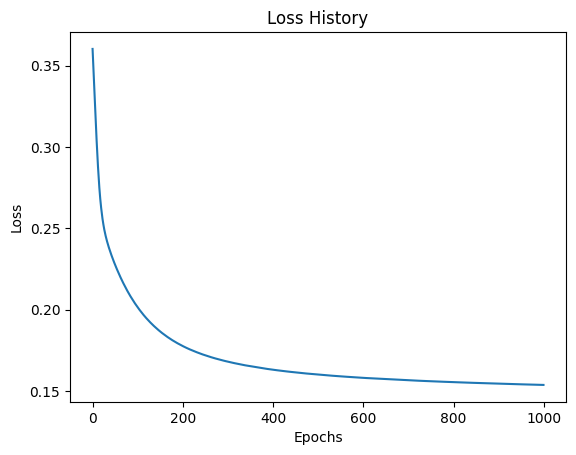

27/27 [==============================] - 0s 860us/step - loss: 0.1536 - accuracy: 0.7783

Test Accuracy	: 0.9828431606292725
Train Accuracy	: 0.7783018946647644


In [179]:
first = PerceptronModel(x_train.shape[1])

history = first.set_loss_history()
first.train(x_train, y_train, epochs=1000, callback=history)

first.plot_loss_history(history.losses)
print(f'\nTest Accuracy\t: {first.get_accuracy(x_test, y_test)}\nTrain Accuracy\t: {first.get_accuracy(x_train, y_train)}')